# Projeto Final
## Estudantes: Luis Gustavo Avelino e Matheus Felizola
## Matrícula: 15/0016310 e 

O intuito desse projeto é criar um classificar que é capaz de interpretar números de 0 até 9 através de imagens da língua de sinais americana.

In [1]:
# Cloning the dataset repository
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2089, done.
remote: Total 2089 (delta 0), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2089/2089), 15.07 MiB | 1.44 MiB/s, done.
Resolving deltas: 100% (658/658), done.


In [2]:
# Installing tqdm library
!pip install tqdm

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [3]:
# Importing useful libraries: keras, numpy, tqdm, matplotlib...

import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


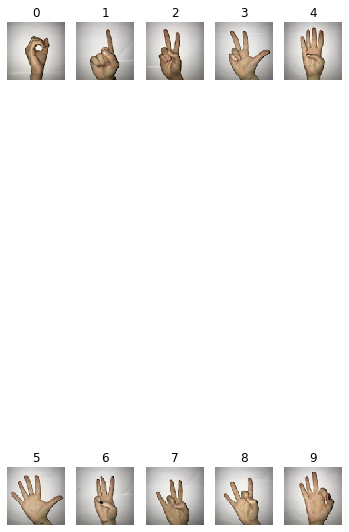

In [4]:
# Creating the example images for the numbers (10 numbers in total - 2 x 5)
number_of_rows, number_of_columns = 2, 5
plt.rcParams['figure.figsize'] = (number_of_rows * 3, number_of_columns * 3)

for row in range(number_of_rows):
    for column in range(number_of_columns):
        image_index = row * number_of_columns + column
        # Loading the images from the dataset
        digit_image = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(image_index) + '.JPG', target_size = (64, 64))
        plt.subplot(number_of_rows, number_of_columns, image_index + 1)
        plt.imshow(digit_image)
        plt.title(image_index)
        plt.axis('off')

In [5]:
# Creating the path to data downloaded dataset
PATH_TO_DATASET = 'Sign-Language-Digits-Dataset/Dataset/'

## Dividindo o dataset em três partes: treino, validação e teste.

In [6]:
# Initialising the empty lists for each dataset
train_dataset = {}
validation_dataset = {}
test_dataset = {}

for cat in os.listdir(PATH_TO_DATASET):
    cat_dir = os.path.join(PATH_TO_DATASET, cat) # e.g. DATASET_PATH/'0'
    cat_files = os.listdir(cat_dir)
    
    # Size of training dataset will be 70% of the total dataset
    train_list , test_list = train_test_split(cat_files, test_size = 0.3)
    
    # Both test and validation datasets are 15% of the total dataset
    validation_list, test_list = train_test_split(test_list, test_size = 0.5)
    
    train_dataset[cat] = train_list
    validation_dataset[cat] = validation_list
    test_dataset[cat] = test_list

### Treino

In [7]:
for cat in tqdm(train_dataset.keys()):
  cat_dir = os.path.join(PATH_TO_DATASET, 'training_dataset', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in train_dataset[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(PATH_TO_DATASET, cat, file)
    # dest path is DATASET_PATH/'training_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 12.87it/s]


### Validação

In [8]:
for cat in tqdm(validation_dataset.keys()):
  cat_dir = os.path.join(PATH_TO_DATASET, 'validation_dataset', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in validation_dataset[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(PATH_TO_DATASET, cat, file)
    # dest path is DATASET_PATH/'validation_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 48.99it/s]


### Teste

In [9]:
for cat in tqdm(test_dataset.keys()):
  cat_dir = os.path.join(PATH_TO_DATASET, 'test_dataset', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in test_dataset[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(PATH_TO_DATASET, cat, file)
    # dest path is DATASET_PATH/'test_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 41.52it/s]
